In [1]:
import tensorflow as tf

# import tf data set 
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
#helper librery

import math
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
# loading dataset form tensorflow datasets.
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

In [5]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandel", "Shirt", "Sneakers", "Bag", "Ankel boot"]

In [6]:
num_train_example = metadata.splits['train'].num_examples
num_test_example = metadata.splits['test'].num_examples
print(num_train_example)
print(num_test_example)

60000
10000


In [7]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# map funtion is applied to both traning data and test data.
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# while executing this code first time it will load data from disc but after that i will store that data in cache data for faster execution.

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()


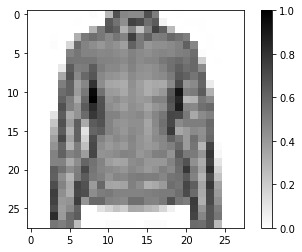

In [8]:
# take a single image and label from the dataset and show it on the graph.
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))

# plot image.

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


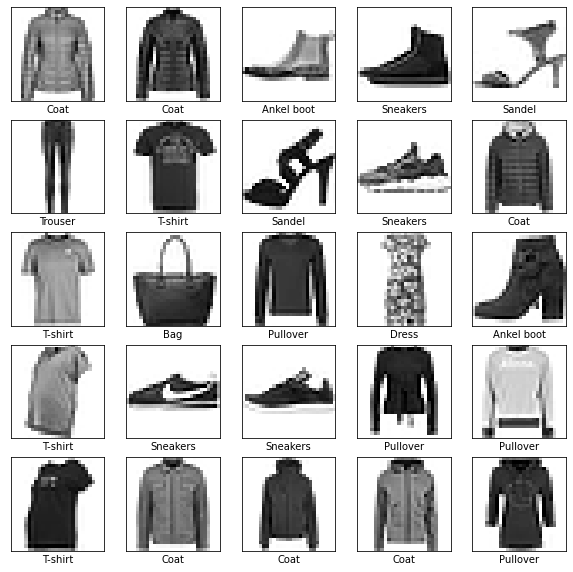

In [9]:
# now take first 25 examples. 

plt.figure(figsize=(10, 10))

for i, (image, label) in enumerate(test_dataset.take(25)):
    image = image.numpy().reshape((28, 28))
    image /= 255
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()


In [10]:
# creataing a model.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    
])

In [11]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [12]:
BATCH_SIZE = 32

train_dataset = train_dataset.repeat().shuffle(num_train_example).batch(BATCH_SIZE)
test_dataset = test_dataset.repeat().shuffle(num_test_example).batch(BATCH_SIZE)


In [13]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_example/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4958 - accuracy: 0.8268
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3723 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3289 - accuracy: 0.8796
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3101 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2915 - accuracy: 0.8921


In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_example/32))
print("accuracy of our model in test data: ", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3551 - accuracy: 0.8745
accuracy of our model in test data:  0.8745008111000061


In [19]:
import matplotlib as m
print(tf.__version__)
print(tfds.__version__)
print(np.__version__)
print(m.__version__)
print(logging.__version__)

2.3.0
4.2.0
1.19.2
3.3.2
0.5.1.2
